In [101]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [102]:
# Load data from CSV files
x_data = np.loadtxt('x.csv', delimiter=',')
y_data = np.loadtxt('y.csv', delimiter=',')
a_data = np.loadtxt('a.csv', delimiter=',')
b_data = np.loadtxt('b.csv', delimiter=',')

In [103]:
x_data.shape

(100,)

In [104]:
# Kalman Filter implementation
def kalman_filter(noisy_coords):
    dt = 0.2
    F = np.array([[1, dt, 0, 0],
                  [0, 1, 0, 0],
                  [0, 0, 1, dt],
                  [0, 0, 0, 1]])

    H = np.array([[1, 0, 0, 0],
                  [0, 0, 1, 0]])

    Q = np.array([[0.16, 0, 0, 0],
                  [0, 0.36, 0, 0],
                  [0, 0, 0.16, 0],
                  [0, 0, 0, 0.36]])

    R = np.array([[0.25, 0],
                  [0, 0.25]])

    estimated_coords = []
    x_est = np.array([noisy_coords[0], 0, noisy_coords[1], 0])  # Initial state

    for i in range(len(noisy_coords)):
        # Prediction step
        x_pred = np.dot(F, x_est)
        P_pred = np.dot(np.dot(F, Q), F.T)

        # Kalman gain
        K = np.dot(np.dot(P_pred, H.T), np.linalg.inv(np.dot(np.dot(H, P_pred), H.T) + R))

        # Update step
        x_est = x_pred + np.dot(K, (noisy_coords[i] - np.dot(H, x_pred)))
        estimated_coords.append([x_est[0], x_est[2]])

    return np.array(estimated_coords)

# Apply Kalman filter to noisy data
estimated_trajectory = kalman_filter(np.column_stack((a_data, b_data)))

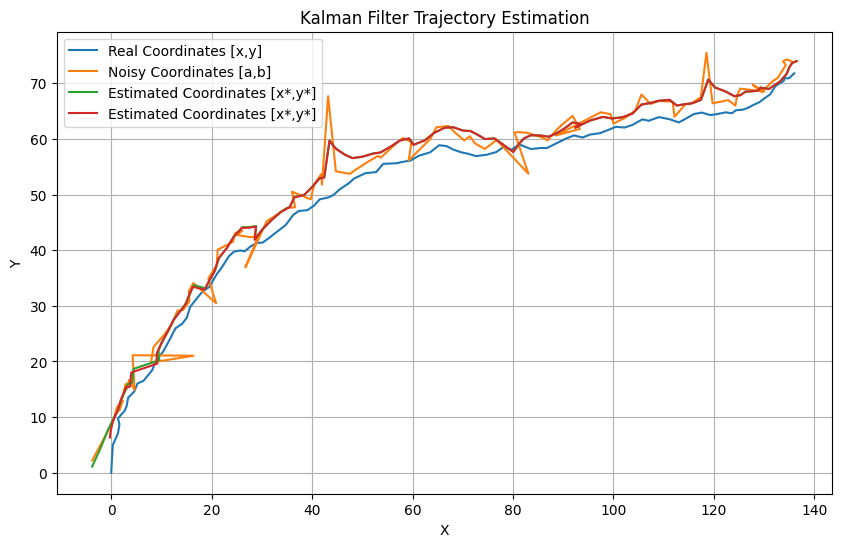

In [105]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_data, y_data, label='Real Coordinates [x,y]')
plt.plot(a_data, b_data, label='Noisy Coordinates [a,b]')
plt.plot(estimated_trajectory[:, 0], estimated_trajectory[:, 1], label='Estimated Coordinates [x*,y*]')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Kalman Filter Trajectory Estimation')
plt.legend()
plt.grid(True)
plt.show()

In [109]:
# Calculate errors
ground_truth_coords = np.column_stack((x_data, y_data))
absolute_errors = np.sqrt(np.sum(np.square(ground_truth_coords - estimated_trajectory[:, :, 1]), axis=1))
mean_absolute_error = np.mean(absolute_errors)
std_absolute_error = np.std(absolute_errors)
rms_error = np.sqrt(np.mean(np.square(absolute_errors)))

# Reporting results
report = f"""
Kalman Filter Trajectory Estimation Report:
--------------------------------------------
Mean Absolute Error: {mean_absolute_error}
Standard Deviation of Absolute Error: {std_absolute_error}
Root Mean Squared Error: {rms_error}
"""

# Calculate mean and standard deviation of absolute and RMS errors
mean_absolute_error = np.mean(absolute_errors)
std_absolute_error = np.std(absolute_errors)
root_mean_squared_error = np.sqrt(np.mean(np.square(absolute_errors)))
mean_rmse = np.mean(root_mean_squared_error)
sd_rmse = np.std(root_mean_squared_error)


# Print the results
print(report)

'''
print(f"Mean of Absolute Error: {mean_absolute_error}")
print(f"Standard Deviation of Absolute Error: {std_absolute_error}")
# print(f"Root Mean Squared Error: {root_mean_squared_error}")
print(f"Mean of RMSE: {mean_rmse}")
print(f"Standard Deviation of RMSE: {sd_rmse}")
'''


Kalman Filter Trajectory Estimation Report:
--------------------------------------------
Mean Absolute Error: 2.7564351419284536
Standard Deviation of Absolute Error: 1.3366240978782533
Root Mean Squared Error: 3.0634129122086993



'\nprint(f"Mean of Absolute Error: {mean_absolute_error}")\nprint(f"Standard Deviation of Absolute Error: {std_absolute_error}")\n# print(f"Root Mean Squared Error: {root_mean_squared_error}")\nprint(f"Mean of RMSE: {mean_rmse}")\nprint(f"Standard Deviation of RMSE: {sd_rmse}")\n'